# Subreddit Classification: Exploratory Data Analysis - Conversations

In [89]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read in the Conversations Data

In [90]:
# Read in data (do not replace empty strings with NaN)
df = pd.read_csv('../data/conversations_clean.csv', na_filter = False)

In [91]:
df.shape

(1694, 16)

In [92]:
df.head(3)

,author,comts_first,comts_num_collected,comts_second,created,edited,name,num_comments,permalink,selftext,subreddit,title,ups,url,text,is_serious
0,FetusGodJim,this made me smile ty for sharing i absolutely...,31,i couldn t find anywhere else to share it and ...,1.554138e+09,False,t3_b8509z,146,/r/CasualConversation/comments/b8509z/man_i_fe...,alright so i recently started working my first...,CasualConversation,man i felt so cool yesterday,4467,https://www.reddit.com/r/CasualConversation/co...,man i felt so cool yesterdayalright so i recen...,0
1,goat_chortle,that s a tremendous milestone see you next yea...,31,you bet i don t think that will be a problem e...,1.554144e+09,False,t3_b86ngu,84,/r/CasualConversation/comments/b86ngu/yay_me_t...,no it s not an april fool s joke lol i actuall...,CasualConversation,yay me today marks 1yr cigarette free,2083,https://www.reddit.com/r/CasualConversation/co...,yay me today marks 1yr cigarette freeno it s n...,0
2,IFartedInMyHeart,i think you have no other choice but to make u...,9,great idea,1.554205e+09,False,t3_b8i03a,9,/r/CasualConversation/comments/b8i03a/cat_school/,found out my daughter thinks when the cat goes...,CasualConversation,cat school,34,https://www.reddit.com/r/CasualConversation/co...,cat schoolfound out my daughter thinks when th...,0


### Visualize Character & Word Counts

In [93]:
# Dataframe subset to get basic counts
counts = df[['title', 'selftext', 'is_serious']]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


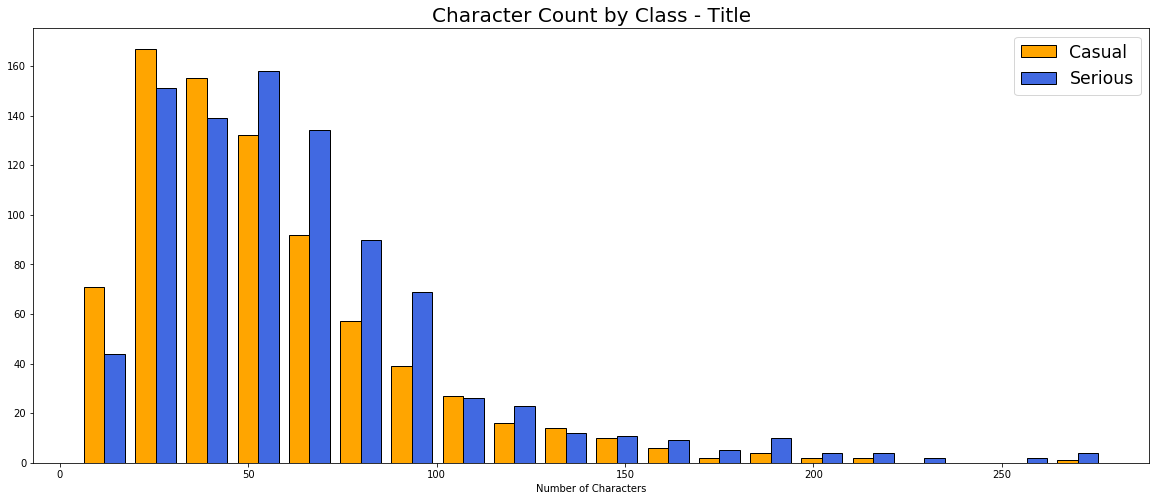

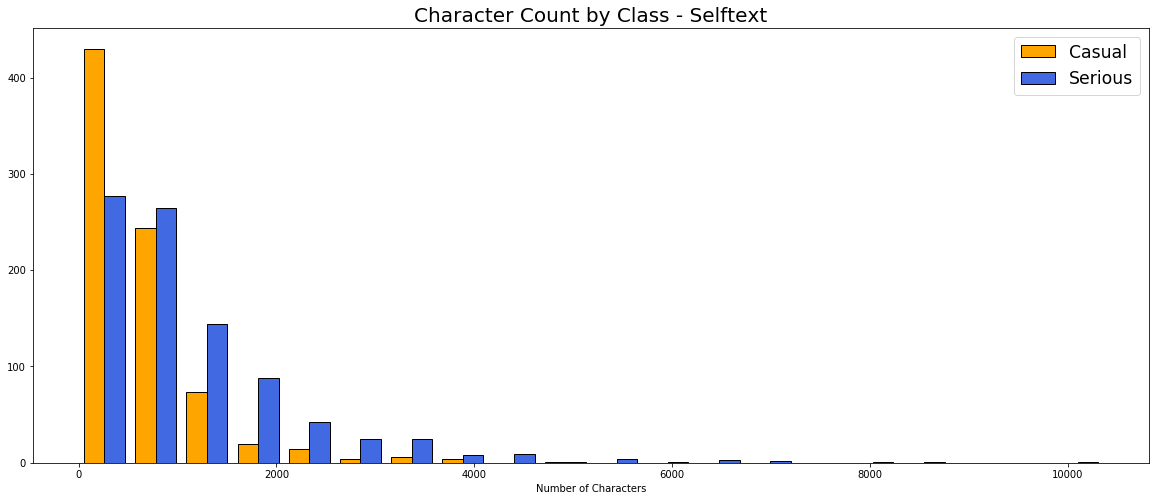

In [94]:
# Reference: code adapted from NLP_EDA in DEN Flex by Sam Stack & Douglas Strodtman

# Look at number of characters in title and selftext
for column in ['title', 'selftext']:
    # Get character count
    counts['char_count_' + column] = df[column].map(len)
    # Get word count
    #counts['word_count_' + column] = df[column].map(lambda x: len(x.split()))

    plt.figure(figsize=(20, 8))
    plt.hist([counts[counts['is_serious']==0]['char_count_' + column], 
              counts[counts['is_serious']==1]['char_count_' + column]],
             bins=20, 
             color=['orange', 'royalblue'], 
             ec='k')
    plt.title('Character Count by Class - ' + column.title(), fontsize=20)
    plt.xlabel('Number of Characters')
    plt.legend(['Casual', 'Serious'], fontsize='xx-large')
    plt.show()

Observations:
- TITLE:
    - Serious tends to have longer titles
    - Casual has a lot of titles under 50 charachters
- SELFTEXT:
    - Serious tends to have longer selftext
    - Casual has a lot of selftext with very few characters
    - The outliers appear to all be coming from Serious
- In general...Serious posts tend to have longer titles and selftext than that of Casual (I think this makes sense given I would expect a post covering a serious topic to be lengthier)

In [95]:
# Find average character count
counts[['char_count_title', 'char_count_selftext']].mean()

char_count_title        59.672373
char_count_selftext    928.275089
dtype: float64

In [96]:
# Find average character count by subreddit
counts[['char_count_title', 'char_count_selftext', 'is_serious']].groupby('is_serious').mean()

,char_count_title,char_count_selftext
is_serious,,
0,54.902133,653.471769
1,63.910814,1172.442586


In [97]:
# Find correlation between character count and subreddit 
counts[['char_count_title', 'char_count_selftext', 'is_serious']].corr()['is_serious'].sort_values()

char_count_title       0.113939
char_count_selftext    0.271459
is_serious             1.000000
Name: is_serious, dtype: float64

Observations:
- Serious posts have much more characters in the title and in the selftext (body)
- The char_count_selftext has a relatively high positive correlation with the target (0.27)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


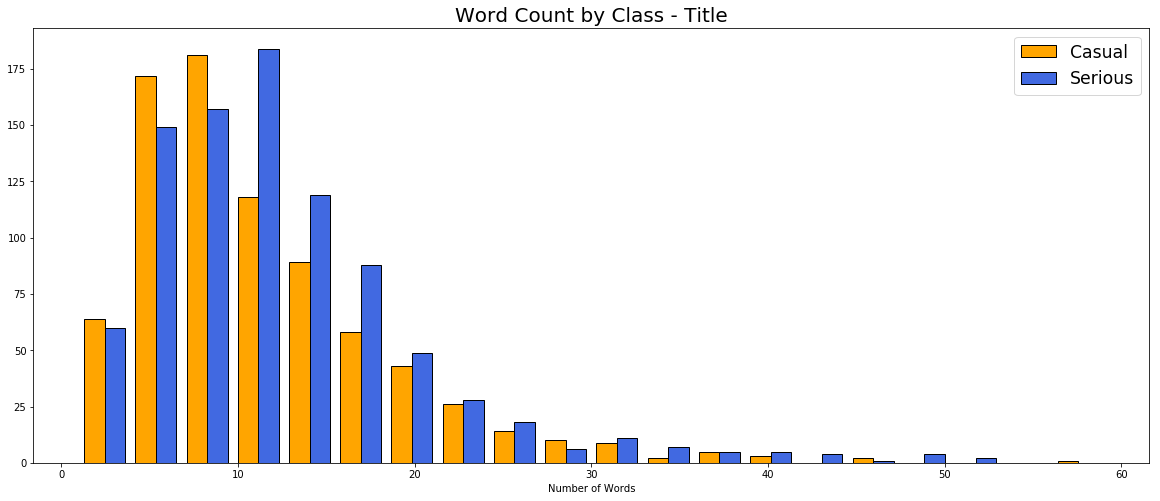

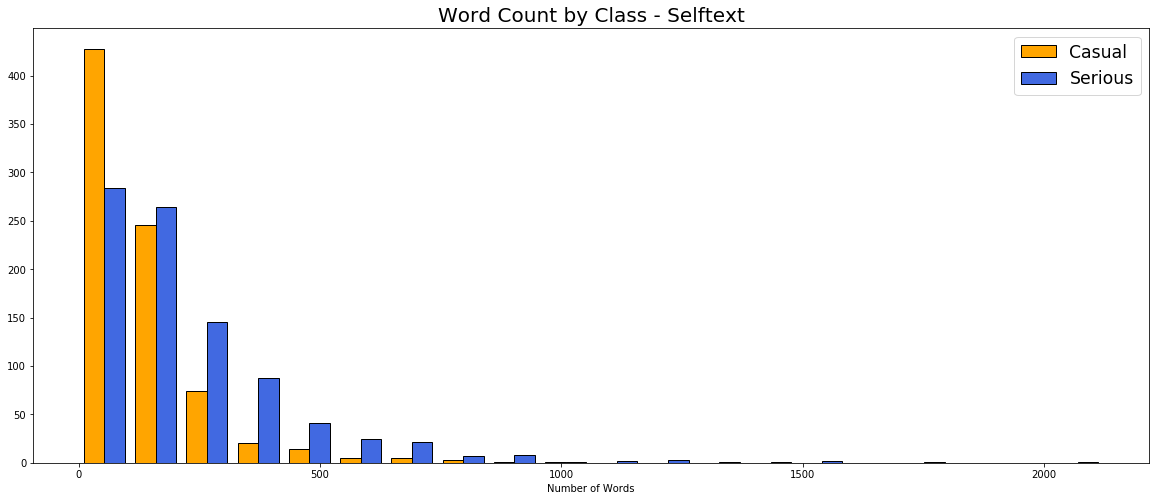

In [98]:
# Look at number of words in title and selftext
for text in ['title', 'selftext']:
    column = 'word_count_' + text
    counts[column] = df[text].map(lambda x: len(x.split()))

    plt.figure(figsize=(20, 8))
    plt.hist([counts[counts['is_serious']==0][column], 
              counts[counts['is_serious']==1][column]],
             bins=20, 
             color=['orange', 'royalblue'], 
             ec='k')
    plt.title('Word Count by Class - ' + text.title(), fontsize=20)
    plt.xlabel('Number of Words')
    plt.legend(['Casual', 'Serious'], fontsize='xx-large');
    plt.show()

In [99]:
# Find average word count in title and selftext
counts[['word_count_title', 'word_count_selftext']].mean()

word_count_title        11.757969
word_count_selftext    185.561393
dtype: float64

In [100]:
# Find average word count by subreddit
counts[['word_count_title', 'word_count_selftext', 'is_serious']].groupby('is_serious').mean()

,word_count_title,word_count_selftext
is_serious,,
0,11.122961,133.381430
1,12.322185,231.924192


In [101]:
# Find correlation between word count and subreddit
counts[['word_count_title', 'word_count_selftext', 'is_serious']].corr()['is_serious'].sort_values()

word_count_title       0.076919
word_count_selftext    0.260647
is_serious             1.000000
Name: is_serious, dtype: float64

Observations:
- Very similar trends to character count
- char_count_selftext is slightly higher correlated witht the target than word_count_selftext

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


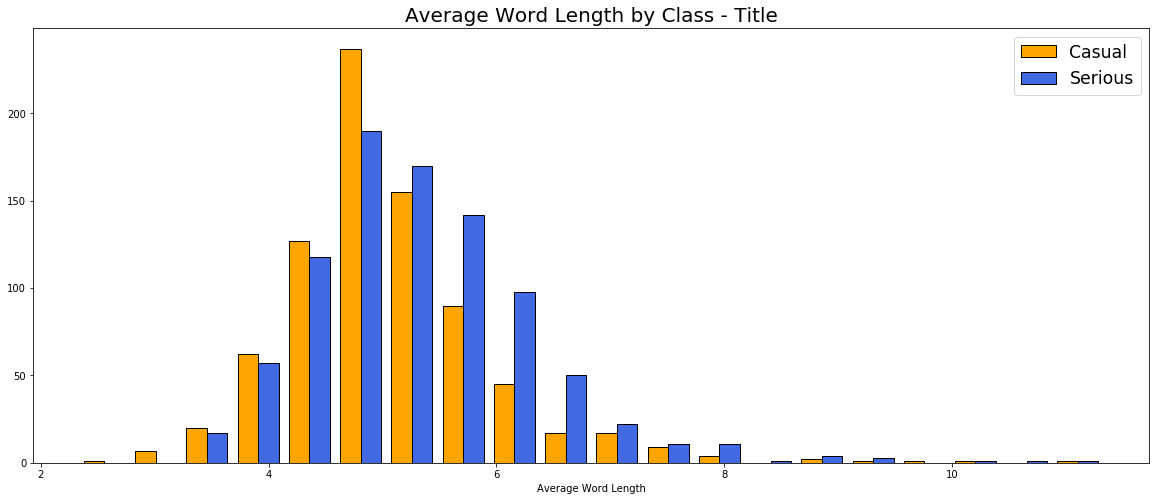

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


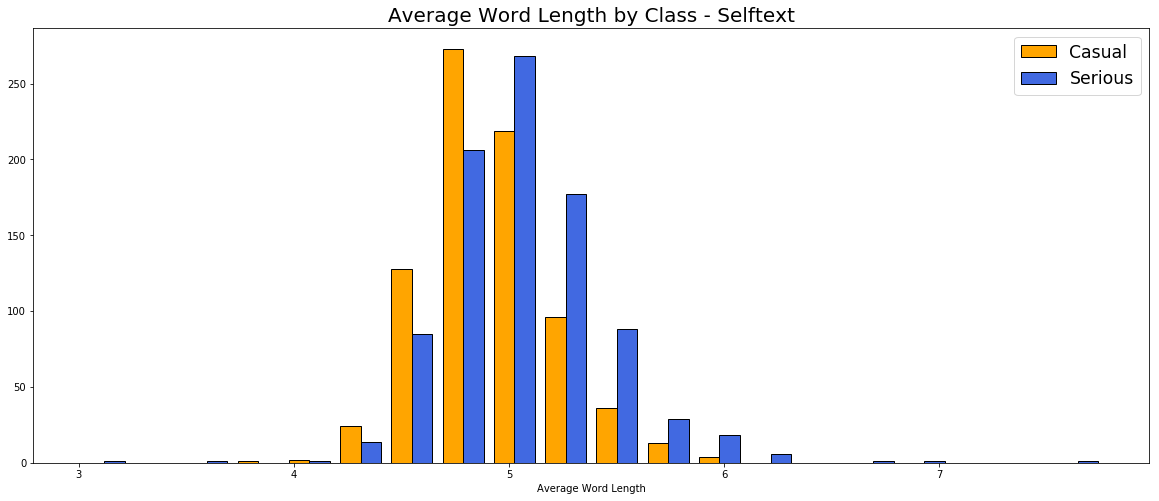

In [102]:
# Look at average word length in title and selftext
for column in ['title', 'selftext']:
    counts['avg_word_length_' + column] = counts['char_count_' + column] / counts['word_count_' + column]

    plt.figure(figsize=(20, 8))
    plt.hist([counts[counts['is_serious']==0]['avg_word_length_' + column], 
              counts[counts['is_serious']==1]['avg_word_length_' + column]],
             bins=20, 
             color=['orange', 'royalblue'],
             ec='k')
    plt.title('Average Word Length by Class - ' + column.title(), fontsize=20)
    plt.xlabel('Average Word Length')
    plt.legend(['Casual', 'Serious'], fontsize='xx-large');
    plt.show()

Observations:
- For title and selftext Serious appears to be almost normally distributed with some upper outliers
- For title and selftext Casual has a right skew and looks like a lower average word length
- Serious posts tend to use longer words than casual posts

In [103]:
# Find average word length in title and selftext
counts[['avg_word_length_title', 'avg_word_length_selftext']].mean()

avg_word_length_title       5.197219
avg_word_length_selftext    4.990377
dtype: float64

In [104]:
# Find average word length by subreddit
counts[['avg_word_length_title', 'avg_word_length_selftext', 'is_serious']].groupby('is_serious').mean()

,avg_word_length_title,avg_word_length_selftext
is_serious,,
0,5.051818,4.910521
1,5.326410,5.061241


In [105]:
# Find correlation between word length and subreddit
counts[['avg_word_length_title', 'avg_word_length_selftext', 'is_serious']].corr()['is_serious'].sort_values()

avg_word_length_title       0.142365
avg_word_length_selftext    0.219630
is_serious                  1.000000
Name: is_serious, dtype: float64

Observations:
- Average word length is right around 5
- avg_word_length_selftext is still positively correlated with the target, but less so than the number of words or number of characters

In [106]:
# Titles where avg_word_length_title is greater than 10
counts[counts['avg_word_length_title'] > 10]

,title,selftext,is_serious,char_count_title,char_count_selftext,word_count_title,word_count_selftext,avg_word_length_title,avg_word_length_selftext
534,antidepressant withdrawal support distraction ...,i m 98 hours in i was doing good up till yeste...,0,52,243,5,43,10.400000,5.651163
658,contradicting personalities abound,does anyone else have a hard time describing t...,0,34,567,3,111,11.333333,5.108108
1237,questioning everything,ever since i can remember i have wanted to be ...,1,22,2441,2,465,11.000000,5.249462
1395,evolutionary morality,1 morality is seeing the other as the self in ...,1,21,1225,2,224,10.500000,5.468750


### Lemmatizing & Stemming the Data

In [107]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [108]:
# Funciton to lemmatize a string
def lemmatize_text(raw_text):
    
    # Split and lemmatize
    lem = WordNetLemmatizer()
    text_lemmed = [lem.lemmatize(word) for word in raw_text.split()]

    # Join back together into a string and return
    return(" ".join(text_lemmed))

In [109]:
# Add new lemmatized text columns
for column in ['title', 'selftext', 'comts_first', 'comts_second']:
    df[column + '_lem'] = df[column].map(lemmatize_text)

In [110]:
print('Before Lemmatizing: ', df['selftext'][3])
print('After Lemmatizing:  ', df['selftext_lem'][3])

Before Lemmatizing:  you think you re safe because it s april second but then everyone else in the world posts their april fools posts and for a split second you believe it but alas time zones are a thing any other australians fall for this
After Lemmatizing:   you think you re safe because it s april second but then everyone else in the world post their april fool post and for a split second you believe it but ala time zone are a thing any other australian fall for this


Observations: looks like in this example mostly the trainling 's' was removed from words

In [111]:
# Function to stem a string
def stem_text(raw_text):

    # Split and step
    ps = PorterStemmer()
    text_stemmed = [ps.stem(word) for word in raw_text.split()]

    # Join back together into a string and return
    return(" ".join(text_stemmed))

In [112]:
# Add new stemmed text columns
for column in ['title', 'selftext', 'comts_first', 'comts_second']:
    df[column + '_stem'] = df[column].map(stem_text)

In [113]:
print('Before Stemming: ', df['selftext'][3])
print('After Stemming:  ', df['selftext_stem'][3])

Before Stemming:  you think you re safe because it s april second but then everyone else in the world posts their april fools posts and for a split second you believe it but alas time zones are a thing any other australians fall for this
After Stemming:   you think you re safe becaus it s april second but then everyon els in the world post their april fool post and for a split second you believ it but ala time zone are a thing ani other australian fall for thi


Observation: removed more than lemmatizing...trailing 's' and some 'e's and changed some 'y's to 'i's at the end

### Count Vectorize Title & Selftext

In [114]:
from sklearn.feature_extraction.text import CountVectorizer

In [115]:
# Set target
target = df['is_serious']

In [116]:
# Look at all columns in dataframe
pd.set_option('display.max_columns', 350)

In [117]:
# Reference: code adapted from NLP_EDA in DEN Flex by Sam Stack & Douglas Strodtman

# Create dataframe for all text in title (lemmed version)
# Instantiate Count Vectorizor (remove english stop words)
# Ignore terms that appear in more than 100% of documents
# Ignore terms that appear in less than 5 documnets
cvec = CountVectorizer(stop_words = 'english', min_df = 5, max_df = 1.0)

# Fit Count Vectorier
all_features = cvec.fit_transform(df['title_lem'])

# Matrix of words to dataframe
title_words_df = pd.DataFrame(all_features.toarray(), columns = cvec.get_feature_names())

print('Number of Features in Title Text (Lemmed): ', len(cvec.get_feature_names()))

# Add target and level type to dataframe
title_words_df.insert(0, 'is_serious', target)
title_words_df.head()

Number of Features in Title Text (Lemmed):  350


,is_serious,10,13,30,50,abuse,actually,adult,advice,afraid,age,ago,amazing,american,amp,anxiety,anybody,anymore,april,asked,attack,bad,beautiful,bed,believe,best,better,big,birthday,bit,book,bored,boyfriend,break,brother,buy,cancer,car,care,career,case,cat,certain,change,changed,changing,character,child,choice,class,close,college,come,coming,company,completely,considered,conversation,crazy,crisis,culture,curious,dad,day,dead,deal,dealing,death,decided,decision,depressed,depression,did,didn,die,died,different,difficult,doctor,doe,doesn,dog,doing,don,dream,drive,drug,dying,eating,end,enjoy,excited,experience,eye,fact,failing,family,father,favor,favorite,feel,feeling,felt,finally,finding,food,fool,form,forward,free,friend,friendship,fun,future,game,getting,girl,girlfriend,goal,going,good,got,gotten,great,group,guilt,guy,ha,handle,happen,happened,happens,happy,hard,hate,haven,having,health,healthy,heart,hello,help,high,home,hope,hospital,hour,house,human,husband,idea,im,important,improve,instead,interesting,internet,interview,isn,issue,job,joke,judge,just,kid,kind,kinda,know,late,lately,law,le,learn,learned,leave,...,let,lie,life,like,literally,little,live,living,ll,lonely,long,look,looking,losing,lost,lot,love,make,making,man,married,maybe,mean,medium,memory,mental,mentally,met,mind,minute,miss,mom,moment,money,month,morning,mother,movie,moving,music,need,new,nice,night,normal,okay,old,older,opinion,outside,parent,passed,past,paying,pedophile,people,person,phone,place,plan,play,point,possible,post,pretty,prevent,probably,problem,question,quit,rape,read,real,realized,really,reason,recently,reddit,relationship,religion,remember,right,rise,routine,sad,saw,say,scared,school,seeing,seen,self,seriously,set,sex,sexual,share,sister,situation,sleep,small,social,society,song,space,start,started,starting,state,stay,step,stop,story,stranger,struggling,suggestion,suicide,super,support,sure,talk,talking,tell,terrible,therapy,thing,think,thinking,thought,time,tip,tired,today,told,tomorrow,tonight,took,topic,toxic,trauma,tried,trouble,trying,turn,turned,uncomfortable,understand,update,use,used,ve,video,wa,wanna,want,wanted,warming,watch,way,week,weekend,weird,white,wife,wish,woman,won,wonder,word,work,working,world,write,wrong,year
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [118]:
# Create dataframe for all text in selftext (lemmed version)
# Instantiate Count Vectorizor (remove english stop words)
# Ignore terms that appear in more than 100% of documents
# Ignore terms that appear in less than 5 documnets
cvec = CountVectorizer(stop_words = 'english', min_df = 5, max_df = 1.0)

# Fit Count Vectorier
all_features = cvec.fit_transform(df['selftext_lem'])

# Matrix of words to dataframe
body_words_df = pd.DataFrame(all_features.toarray(), columns = cvec.get_feature_names())

print('Number of Features in Body Text (Lemmed): ', len(cvec.get_feature_names()))

# Add target and level type to dataframe
body_words_df.insert(0, 'is_serious', target)
body_words_df.head()

Number of Features in Body Text (Lemmed):  2943


,is_serious,00,000,10,100,11,12,13,14,15,16,17,18,19,1st,20,200,2013,2015,2016,2017,2018,2019,2020,21,22,23,24,25,26,27,28,2nd,30,300,35,3rd,40,45,4th,50,500,5th,60,6th,70,75,7th,80,8th,90,99,abandoned,ability,able,abroad,absolute,absolutely,abuse,abused,abusive,academic,accent,accept,acceptable,accepted,accepting,access,accident,accidentally,accommodate,accomplish,accomplished,accomplishment,according,account,achieve,achieved,achievement,achieving,acknowledge,acquaintance,act,acted,acting,action,active,actively,activity,actor,actual,actually,add,added,addict,addicted,addiction,addition,address,admit,admitted,adult,adulthood,advance,advanced,advancement,advantage,adventure,adversity,advice,affect,affected,affection,afford,afraid,afterlife,afternoon,age,aged,agency,ago,agree,agreed,ahead,aid,air,aka,album,alcohol,alcoholic,alien,alive,allow,allowed,allowing,allows,alot,alright,alternative,altogether,amazing,ambition,america,american,amp,anger,angry,animal,anniversary,annoyed,annoying,anonymous,answer,answered,answering,anti,anxiety,anxious,anybody,anymore,anytime,anyways,apart,apartment,apathy,apologise,apologize,app,apparently,appear,appearance,appears,application,applied,apply,...,unrelated,unsure,upbringing,upcoming,update,upper,upset,upsetting,urge,usa,use,used,useful,useless,user,username,using,usual,usually,vacation,vaccine,vague,valid,valuable,value,variety,various,vast,ve,vehicle,vent,verbally,verge,version,vet,vibe,victim,video,view,violence,violent,vision,visit,visited,visiting,vivid,voice,void,volunteer,vote,voting,wa,wage,wait,waited,waiting,wake,waking,walk,walked,walking,wall,wallet,walmart,wanna,want,wanted,wanting,war,warehouse,warm,warming,warning,wash,washing,wasn,waste,wasted,wasting,watch,watched,watching,water,wave,way,weak,weakness,wealthy,wear,wearing,weather,web,website,wedding,weed,week,weekend,weekly,weight,weird,weirdly,weirdo,welcome,went,weren,whats,whatsapp,wheel,white,wholesome,wide,wife,wikipedia,wild,willing,win,wind,window,wing,winter,wisdom,wise,wish,wished,woke,woman,won,wonder,wondered,wonderful,wondering,wont,wood,word,work,worked,worker,working,workout,world,worried,worry,worrying,worse,worst,worth,worthless,worthy,wouldn,wow,write,writer,writing,written,wrong,wrote,wtf,www,x200b,ya,yard,yay,yeah,year,yell,yelling,yes,yesterday,yoga,young,younger,youth,youtube,zero,zone
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### Look at Word Frequency - TITLE

In [119]:
# Reference: code adapted from NLP_EDA in DEN Flex by Sam Stack & Douglas Strodtman

# Create a dataframe with every word feature and the number of times that word appears in our title data
title_word_counts = {column : title_words_df[column].sum() for column in title_words_df.columns[1:]}
twc = pd.DataFrame(title_word_counts, index = ['counts']).T

# View sorted 
twc.sort_values(by = 'counts', ascending = False).head(15)

,counts
just,118
like,103
life,101
feel,97
people,96
friend,95
think,71
really,62
don,61
ha,58


Observation: There is over a 60 count difference between the top word and the bottom words 

In [120]:
# Taking the top 15 most appearing words and put them in a list and add 'target' to the list
top15 = list(twc.sort_values(by = 'counts', ascending = False).head(15).index)
top15.append('is_serious')

# Taking words 15 through 30 of most occuring words
next_15 = list(twc.sort_values(by = 'counts', ascending = False).iloc[15:30].index)
next_15.append('is_serious')

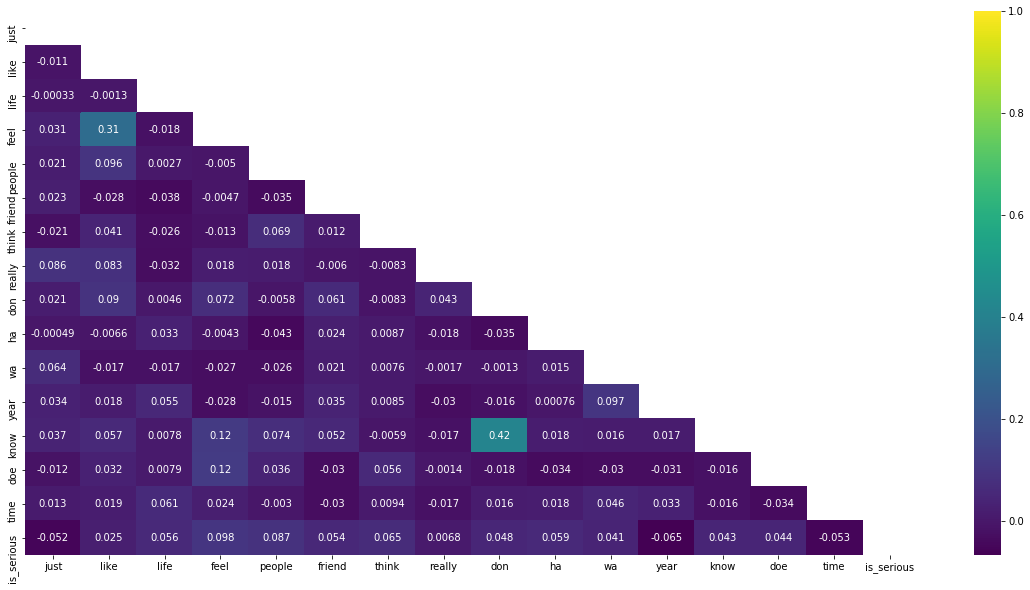

In [121]:
# Looking at the top 15 words that occur and their correlation to the target as well as other top words
plt.figure(figsize = (20,10))

corr = title_words_df[top15].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,mask = mask, cmap='viridis', annot = True);

Observations:
- 'don' and 'know' have a relatively high postiive correlation (0.42)...assuming "don't know"
- 'like' and 'feel' have a relateively high postiive correlation (0.31)....assuming "feel like"

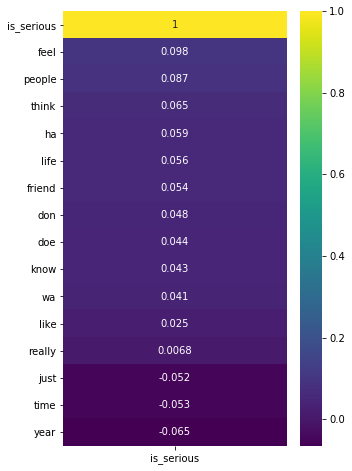

In [122]:
# Looking at the top 15 words that occur and their correlation to just the target (is_serious)
plt.figure(figsize=(5,8))
sns.heatmap(title_words_df[top15].corr()[['is_serious']].sort_values('is_serious', ascending=False),
            annot=True, cmap='viridis');

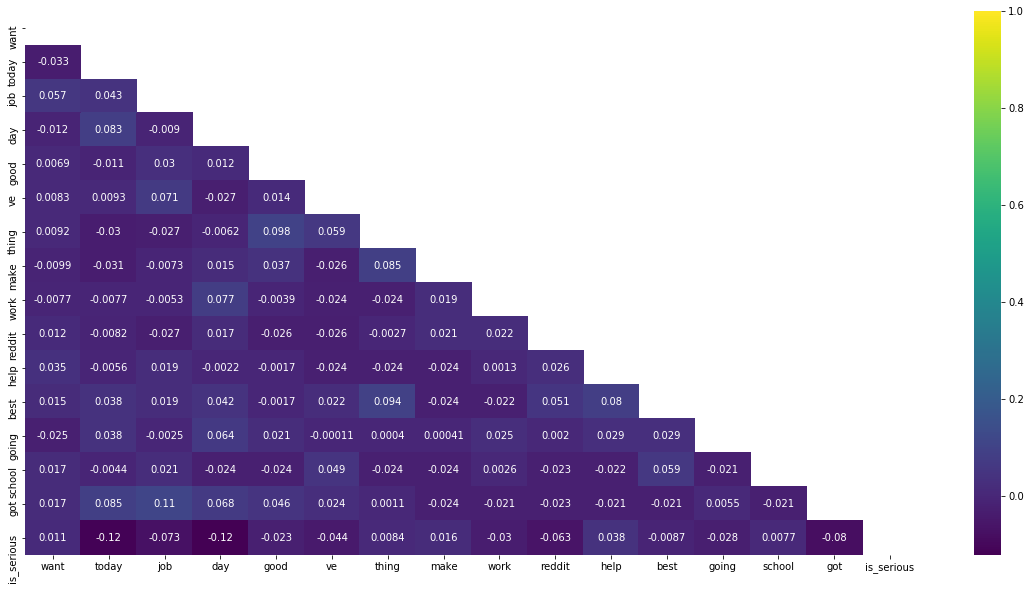

In [123]:
# Looking at the next 15 words that occur and their correlation to the target as well as other top words
plt.figure(figsize = (20,10))

corr = title_words_df[next_15].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,mask = mask, cmap='viridis', annot = True);

**Identify Most and Least Correlated Words with Target (Serious) - TITLE**

In [124]:
# Least correlated with target = 1 (aka correlated with casual)
title_words_df.corr().sort_values(by='is_serious')['is_serious'].head(20)

day         -0.121634
today       -0.116776
april       -0.089608
fool        -0.085767
favorite    -0.085109
finally     -0.083110
new         -0.081939
got         -0.080272
looking     -0.079741
music       -0.073983
job         -0.073266
morning     -0.071042
interview   -0.068337
hour        -0.068067
game        -0.066115
year        -0.065491
phone       -0.065331
plan        -0.063249
bed         -0.063249
weekend     -0.063249
Name: is_serious, dtype: float64

Words Correlated with Casual (Target = 0):
- 'day'
- 'today'
- 'april'
- 'fool'....'April Fool's Day'
- 'faborite'
- 'finally'

In [125]:
# Look at rows where column contain 'April Fool's Day'
april = []
for i, title in enumerate(df['title']):
    if 'april fool' in title.lower():
        april.append(i)
print('Number of April Fools Titles: ', len(april))
df.iloc[april][['title', 'is_serious']]

Number of April Fools Titles:  10


,title,is_serious
3,april fools really bothers me because it prett...,0
19,my friend and i may have pulled off our best a...,0
48,reddit is basically immune to april fools day,0
72,april fool s youtube is terrible,0
76,i ve just ordered about 30 of indian food for ...,0
78,oday i got fired on april fools day i just hop...,0
88,dad just got me with a good april fools joke,0
109,i think april fools day should be changed to r...,0
155,is anybody else super excited for reddit on ap...,0
239,need ideas taking twin sister to the school i ...,0


Observation: There are 10 posts that contain the words 'April Fools'...all in the casual subreddit

In [148]:
# Most correlated with target = 1 (aka correlated with serious)
title_words_df.corr().sort_values(by='is_serious', ascending=False)['is_serious'].head(20)

is_serious      1.000000
feel            0.097842
death           0.094905
people          0.087320
depressed       0.082894
suicide         0.079618
child           0.078506
relationship    0.076470
problem         0.075212
isn             0.072638
depression      0.072638
issue           0.068890
culture         0.064931
think           0.064523
parent          0.063301
close           0.061481
need            0.060757
case            0.060719
adult           0.060719
die             0.060719
Name: is_serious, dtype: float64

Words Correlated with Casual (Target = 1):
- 'feel'
- 'death'
- 'people'
- 'depressed'
- 'suicide'
- 'child'

In [127]:
# Find list of top 200 terms from each class
top_words_casual = list(title_words_df.groupby('is_serious').
    mean().T.sort_values(0, ascending=False).head(200).index)

top_words_serious = list(title_words_df.groupby('is_serious').
     mean().T.sort_values(1, ascending=False).head(200).index)

In [128]:
# Look at words that overlap
top_words_overlap = [serious for serious in top_words_serious if serious in top_words_casual]

Conduct a hypothesis test on this.

$H_0$: The subreddits for serious and casual have the same mean frequency for word $x$.

$H_A$: The subreddits for serious and casual have a different mean frequency for word $x$.

We'll set our alpha at .05

In [129]:
from scipy.stats import ttest_ind

In [130]:
# Store P-Value, tstat and word
ttest_dict = {}

for word in top_words_overlap:
    ttest_dict[word] = ttest_ind(title_words_df[title_words_df['is_serious']==1][word], 
         title_words_df[title_words_df['is_serious']==0][word])

In [131]:
# All words with pvalue less than 0.05
# These are significant (shouldn't remove)
{word : '{:0.7f}'.format(test.pvalue)
     for word, test in ttest_dict.items() if test.pvalue < 0.05 }

{'feel': '0.0000549',
 'people': '0.0003205',
 'life': '0.0216363',
 'friend': '0.0252109',
 'just': '0.0310317',
 'think': '0.0078964',
 'don': '0.0479327',
 'ha': '0.0145463',
 'need': '0.0123797',
 'thought': '0.0432497',
 'time': '0.0300292',
 'parent': '0.0091591',
 'year': '0.0070090',
 'job': '0.0025502',
 'reddit': '0.0098781',
 'today': '0.0000014',
 'getting': '0.0492674',
 'got': '0.0009438',
 'new': '0.0007364',
 'day': '0.0000005',
 'hour': '0.0050679',
 'night': '0.0145620'}

In [132]:
# Words that are not significant (can remove)
remove_dict = {word : '{:0.7f}'.format(test.pvalue)
                 for word, test in ttest_dict.items() if test.pvalue >= 0.05 }
remove_dict

{'like': '0.2944511',
 'wa': '0.0940871',
 'doe': '0.0706974',
 'know': '0.0756452',
 'really': '0.7790853',
 'want': '0.6414959',
 'make': '0.5111944',
 'thing': '0.7288684',
 'help': '0.1184005',
 'good': '0.3363609',
 'school': '0.7518716',
 'person': '0.1339137',
 'world': '0.0780078',
 'best': '0.7196762',
 'work': '0.2153787',
 'feeling': '0.4354507',
 'way': '0.5651289',
 've': '0.0681730',
 'bad': '0.3176558',
 'going': '0.2565590',
 'having': '0.9081862',
 'believe': '0.0937427',
 'hate': '0.1967223',
 'advice': '0.4084520',
 'actually': '0.4298632',
 'love': '0.1089684',
 'kid': '0.3703571',
 'dad': '0.0759188',
 'conversation': '0.6988028',
 'self': '0.1432913',
 'guy': '0.8853762',
 'better': '0.1585523',
 'health': '0.1122889',
 'tell': '0.3597101',
 'talk': '0.2089607',
 'start': '0.4422817',
 'sad': '0.6261395',
 'let': '0.6451092',
 'college': '0.2089607',
 'did': '0.8010036',
 'happy': '0.1268001',
 'right': '0.8010036',
 'say': '0.8010036',
 'sure': '0.9993104',
 'old

### Look at Word Frequency - BODY (Selftext)

In [37]:
# Reference: code adapted from NLP_EDA in DEN Flex by Sam Stack & Douglas Strodtman

# Create a dataframe with every word feature and the number of times that word appears in our selftext data
body_word_counts = {column : body_words_df[column].sum() for column in body_words_df.columns[1:]}
bwc = pd.DataFrame(body_word_counts, index = ['counts']).T

# View sorted 
bwc.sort_values(by = 'counts', ascending = False).head(15)

,counts
wa,2356
just,1884
like,1813
people,1249
don,1195
know,1159
feel,1128
time,1062
really,997
ve,987


In [38]:
# Taking the top 15 most appearing words and put them in a list and add 'target' to the list
top15 = list(bwc.sort_values(by = 'counts', ascending = False).head(15).index)
top15.append('is_serious')

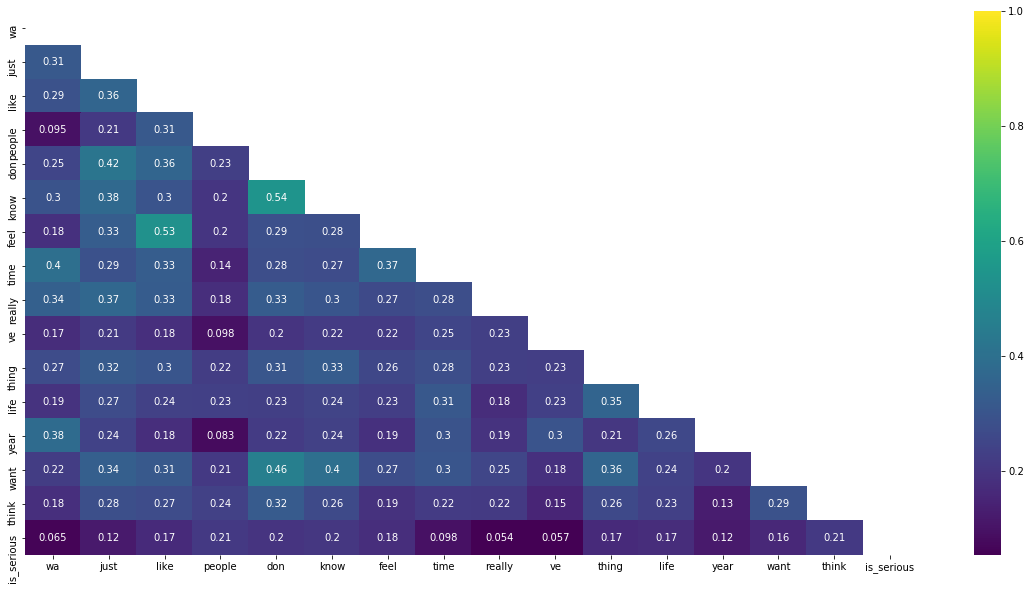

In [39]:
# Looking at the top 15 words that occur and their correlation to the target as well as other top words
plt.figure(figsize = (20,10))

corr = body_words_df[top15].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,mask = mask, cmap='viridis', annot = True);

Observations:
- 'feel' and 'like' have a relatively high postiive correlation (0.52)...assuming "feel like"
- 'don' and 'know' have a relateively high postiive correlation (0.54)....assuming "don't know"

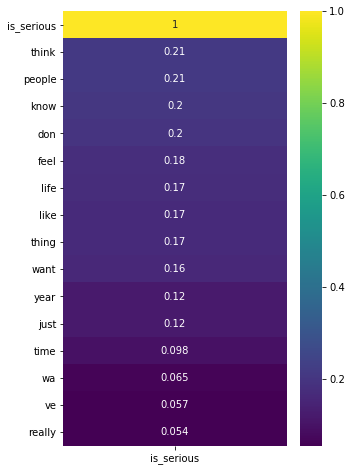

In [40]:
# Looking at the top 15 words that occur and their correlation to just the target (is_serious)
plt.figure(figsize=(5,8))
sns.heatmap(body_words_df[top15].corr()[['is_serious']].sort_values('is_serious', ascending=False),
            annot=True, cmap='viridis');

**Identify Most and Least Correlated Words with Target (Serious) - BODY**

In [41]:
# Least correlated with target = 1 (aka correlated with casual)
body_words_df.corr().sort_values(by='is_serious')['is_serious'].head(20)

favorite     -0.125747
excited      -0.107037
song         -0.100475
today        -0.086910
nervous      -0.086858
spring       -0.082371
interview    -0.078760
lol          -0.076644
morning      -0.075553
taste        -0.075338
wash         -0.073077
excitement   -0.073077
woke         -0.072161
band         -0.070009
yay          -0.068337
music        -0.066658
forgot       -0.065228
proud        -0.065107
headphone    -0.064558
listening    -0.063806
Name: is_serious, dtype: float64

Words Correlated with Casual (Target = 0):
- 'favorite'
- 'excited'
- 'song'
- 'today'
- 'nervous'
- 'spring'

In [42]:
# Most correlated with target = 1 (aka correlated with serious)
body_words_df.corr().sort_values(by='is_serious', ascending=False)['is_serious'].head(20)

is_serious    1.000000
think         0.212360
people        0.209847
know          0.202399
don           0.196499
ha            0.190870
feel          0.177229
life          0.174835
like          0.167484
thing         0.166313
want          0.159065
situation     0.153691
help          0.151944
human         0.144010
advice        0.142377
issue         0.137857
doesn         0.137549
need          0.136482
death         0.135060
wrong         0.132000
Name: is_serious, dtype: float64

Words Correlated with Casual (Target = 1):
- 'think'
- 'people'
- 'know'
- 'feel'
- 'like'
- 'situation'

In [43]:
# Find list of top 200 terms from each class
top_words_casual = list(body_words_df.groupby('is_serious').
    mean().T.sort_values(0, ascending=False).head(200).index)

top_words_serious = list(body_words_df.groupby('is_serious').
     mean().T.sort_values(1, ascending=False).head(200).index)

In [44]:
# Look at overlap
top_words_overlap = [serious for serious in top_words_serious if serious in top_words_casual]

Conduct a hypothesis test on this.

$H_0$: The subreddits for serious and casual have the same mean frequency for word $x$.

$H_A$: The subreddits for serious and casual have a different mean frequency for word $x$.

We'll set our alpha at .05

In [45]:
# Store P-Value, tstat and word
ttest_dict = {}

for word in top_words_overlap:
    ttest_dict[word] = ttest_ind(body_words_df[body_words_df['is_serious']==1][word], 
         body_words_df[body_words_df['is_serious']==0][word])

In [46]:
# All words with pvalue less than 0.05
# These are significant (shouldnt remove)
# Could go through every overlapping words
{word : '{:0.7f}'.format(test.pvalue)
     for word, test in ttest_dict.items() if test.pvalue < 0.05 }

{'wa': '0.0072143',
 'like': '0.0000000',
 'just': '0.0000012',
 'people': '0.0000000',
 'don': '0.0000000',
 'know': '0.0000000',
 'feel': '0.0000000',
 'life': '0.0000000',
 'time': '0.0000560',
 'thing': '0.0000000',
 'want': '0.0000000',
 'really': '0.0252524',
 've': '0.0196167',
 'think': '0.0000000',
 'year': '0.0000007',
 'ha': '0.0000000',
 'friend': '0.0013243',
 'make': '0.0000002',
 'work': '0.0033190',
 'way': '0.0000025',
 'good': '0.0075753',
 'going': '0.0004575',
 'say': '0.0000003',
 'school': '0.0006037',
 'thought': '0.0000348',
 'lot': '0.0000617',
 'person': '0.0000045',
 'amp': '0.0186118',
 'help': '0.0000000',
 'need': '0.0000000',
 'right': '0.0000004',
 'did': '0.0002769',
 'x200b': '0.0385413',
 'told': '0.0000910',
 'come': '0.0000002',
 'feeling': '0.0003699',
 'talk': '0.0039148',
 'didn': '0.0250731',
 'month': '0.0131424',
 'started': '0.0006298',
 'family': '0.0000013',
 'hard': '0.0000007',
 'thinking': '0.0000155',
 'parent': '0.0000057',
 'world': '

In [47]:
# Words I can remove
{word : '{:0.7f}'.format(test.pvalue)
     for word, test in ttest_dict.items() if test.pvalue >= 0.05 }

{'day': '0.6298349',
 'got': '0.9865898',
 'job': '0.7221887',
 'love': '0.1563306',
 'doing': '0.0896863',
 'said': '0.0505733',
 'll': '0.4157451',
 'new': '0.2565646',
 'guy': '0.8321125',
 'tell': '0.0813923',
 'week': '0.5564507',
 'look': '0.6014433',
 'pretty': '0.3949301',
 'place': '0.2961100',
 'happy': '0.4929151',
 'able': '0.0511236',
 'little': '0.7170524',
 'start': '0.1955278',
 'ago': '0.2240150',
 'went': '0.5539979',
 'college': '0.2454391',
 'past': '0.1251746',
 'wanted': '0.4741994',
 'used': '0.2632892',
 'girl': '0.2901751',
 'looking': '0.4685898',
 'http': '0.0557896',
 'wasn': '0.2398353',
 'recently': '0.1035052',
 'hope': '0.0664146',
 'great': '0.2602758',
 'came': '0.2173970',
 'house': '0.1774695',
 'working': '0.8759428',
 'hour': '0.7577566',
 'reddit': '0.6091153',
 'class': '0.3128694',
 'guess': '0.3439640',
 'probably': '0.8105936',
 'conversation': '0.1906332',
 'shit': '0.0809635',
 'night': '0.5548166',
 'story': '0.8269812',
 'couple': '0.68901

### Sentiment Analysis by Class - Title

In [48]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [49]:
sia = SentimentIntensityAnalyzer()

In [50]:
dicts = []

for st in df['title']:
    scores = sia.polarity_scores(st)  
    scores['text'] = st
    dicts.append(scores)

In [51]:
df_sent_title = pd.DataFrame(dicts)
df_sent_title['target'] = target

In [52]:
df_sent_title.head()

,compound,neg,neu,pos,text,target
0,0.4572,0.000,0.572,0.428,man i felt so cool yesterday,0
1,0.7717,0.000,0.427,0.573,yay me today marks 1yr cigarette free,0
2,0.0000,0.000,1.000,0.000,cat school,0
3,-0.2716,0.225,0.638,0.136,april fools really bothers me because it prett...,0
4,-0.2382,0.122,0.878,0.000,out of all of the madness i cannot believe tha...,0


In [53]:
df_sent_title.groupby(by='target').mean()

,compound,neg,neu,pos
target,,,,
0,0.104448,0.081238,0.772923,0.145836
1,-0.080703,0.161520,0.724278,0.114212


In [54]:
# Correlation with target
df_sent_title.corr()[['target']]

,target
compound,-0.219046
neg,0.225291
neu,-0.109952
pos,-0.087360
target,1.000000


### Sentiment Analysis by Class - Body

In [55]:
dicts = []

for st in df['selftext']:
    scores = sia.polarity_scores(st)  
    scores['text'] = st
    dicts.append(scores)

In [56]:
df_sent_body = pd.DataFrame(dicts)
df_sent_body['target'] = target

In [57]:
df_sent_body.head()

,compound,neg,neu,pos,text,target
0,0.9642,0.049,0.760,0.191,alright so i recently started working my first...,0
1,0.9647,0.033,0.601,0.366,no it s not an april fool s joke lol i actuall...,0
2,0.4939,0.000,0.916,0.084,found out my daughter thinks when the cat goes...,0
3,-0.7184,0.151,0.806,0.042,you think you re safe because it s april secon...,0
4,-0.8454,0.139,0.768,0.093,i am sorry for posting about such things but i...,0


In [58]:
df_sent_body.groupby(by='target').mean()

,compound,neg,neu,pos
target,,,,
0,0.480663,0.070785,0.775242,0.15270
1,0.046552,0.112041,0.768111,0.11981


In [59]:
# Correlation with target
df_sent_body.corr()[['target']]

,target
compound,-0.289698
neg,0.306495
neu,-0.039611
pos,-0.212558
target,1.000000
